# MACHINE_LEARNING_PROJECT

# Features¶
 ### product_id - Product ID
### product_name - Name of the Product
### category - Category of the Product
### discounted_price - Discounted Price of the Product
### actual_price - Actual Price of the Product
### discount_percentage - Percentage of Discount for the Product
### rating - Rating of the Product
### rating_count - Number of people who voted for the Amazon rating
### about_product - Description about the Product¶
### user_id - ID of the user who wrote review for the Product
### user_name - Name of the user who wrote review for the Product
### review_id - ID of the user review
### review_title - Short review
### review_content - Long review
### img_link - Image Link of the Product
### product_link - Official Website Link of the Product


# Import Libraries

## We will use the following libraries
 ### 1. Pandas: Data manipulation and analysis
###  2. Numpy: Numerical operations and calculations
### 3.  Matplotlib: Data visualization and plotting
### 4. Seaborn: Enhanced data visualization and statistical graphics
###  5. Scipy: Scientific computing and advanced mathematical operations

<img src="download2.jpeg">


# Accessories And Peripherals

<img src="OIP (1).jpeg">,
<img src="819yxXktSyL._AC_UL160_SR160,160_.jpg">
<img src="41H5MUcD45L._AC_UY327_FMwebp_QL65_.webp">
<img src="61P-c1Q4MdL._SX425_.jpg">
<img src="41SxFyInrqL._AC_UY327_FMwebp_QL65_.webp">

# Import Libraries

In [311]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
#STOPWORDS=set(stopwords.words("english"))
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.api import OLS
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import ttest_ind
from statsmodels.stats.weightstats import ztest
from scipy.stats import shapiro
from scipy.stats import boxcox
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from collections import Counter
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
import pickle
import re
import statsmodels.api as sm

# DATA

In [312]:
df=pd.read_csv("amazon.csv.zip")
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [313]:
df.apply(pd.unique).to_frame(name='Unique Values')

,Unique Values
product_id,"[B07JW9H4J1, B098NS6PVG, B096MSW6CT, B08HDJ86N..."
product_name,[Wayona Nylon Braided USB to Lightning Fast Ch...
category,[Computers&Accessories|Accessories&Peripherals...
discounted_price,"[₹399, ₹199, ₹329, ₹154, ₹149, ₹176.63, ₹229, ..."
actual_price,"[₹1,099, ₹349, ₹1,899, ₹699, ₹399, ₹1,000, ₹49..."
discount_percentage,"[64%, 43%, 90%, 53%, 61%, 85%, 65%, 23%, 50%, ..."
rating,"[4.2, 4.0, 3.9, 4.1, 4.3, 4.4, 4.5, 3.7, 3.3, ..."
rating_count,"[24,269, 43,994, 7,928, 94,363, 16,905, 24,871..."
about_product,[High Compatibility : Compatible With iPhone 1...
user_id,"[AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRB..."


# OOPS CONCEPTS

In [314]:
class ML_Model:
    # 1) Read the file
    def __init__(self,path):                   # constructor => Read file
        self.path = path
        if self.path.endswith('csv.zip'):
            self.df = pd.read_csv(self.path,encoding='latin1')
        elif self.path.endswith('xlsx'):
            self.df = pd.read_excel(self.path)
        else:
            print('File is neither csv nor xlsx')
        self.df1 = self.df.copy()
        
    # 2) Detect Null values
    def detect_null(self):                     # instance method  
        self.nv = self.df.isnull().sum()
        self.nv = self.nv[self.nv>0]
        self.nv_df = pd.DataFrame({'Feature':self.nv.index,'Count_Null':self.nv.values,
                                   'Percent_Null':(self.nv.values/self.df.shape[0])*100})
        self.nv_df = self.nv_df.sort_values('Percent_Null',ascending=False) 
        return self.nv_df
    
    # 3) Separate Numerical and Categorical features
    def separate_num_cat_feat(self):           # instance method
        self.num_cols = self.df.dtypes[self.df.dtypes!='object'].index
        self.cat_cols = self.df.dtypes[self.df.dtypes=='object'].index
        
    # 4) Drop Redundant Features => Roll_No, Reg_No, etc
    def drop_redundant_feat(self,feat_list):   # feat_list = list of feat to drop
        self.feat_list = feat_list
        self.df.drop(self.feat_list,axis=1,inplace=True)
        
    # 5) Check Duplicates
    def handle_duplicates(self):
        if self.df.duplicated().sum()>0:
            self.df.drop_duplicates(inplace=True)
        else:
            print('No duplicates found')
    #6) Outliers treatment
    def OutlierDetector(self):
        self.data = []
        self.threshold = None
        self.outliers = []

    def set_data(self, data):
        self.data = data

    def set_threshold(self, threshold):
        self.threshold = threshold

    def detect_outliers(self):
        if self.threshold is None:
            raise ValueError("Threshold not set. Please set the threshold first.")

        self.outliers = [x for x in self.data if x > self.threshold]
        return self.outliers
        
    # 7) Treat Null values - Use KNNImputer and SimpleImputer
    def treat_null(self,cat_col_list=None, num_col_list=None):
        self.cat_col_list = cat_col_list
        self.num_col_list = num_col_list
        
        self.sim_im = SimpleImputer(strategy='most_frequent')
        self.cat_col_list_im = self.sim_im.fit_transform(self.df[cat_col_list])
        self.df[cat_col_list] = self.cat_col_list_im
        
        self.knn_im = KNNImputer(n_neighbors=5)
        self.knn_im_res = self.knn_im.fit_transform(self.df[self.num_cols])
        self.df[num_col_list] = self.knn_im_res
        
        return self.df.isnull().sum()
    

In [315]:
m1 = ML_Model("amazon.csv.zip")
m1.df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,â¹399,"â¹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,â¹199,â¹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,â¹199,"â¹1,899",90%,3.9,"7,928",ã Fast Charger& Data Syncã-With built-in s...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,â¹329,â¹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,â¹154,â¹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


# NULL VALUES

In [316]:
nv_df = m1.detect_null()
nv_df

,Feature,Count_Null,Percent_Null
0,rating_count,2,0.136519


In [317]:
df[df['rating_count'].isnull()].head(2)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,80%,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,₹249,₹999,75%,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...


In [318]:
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

# DUPLICATES

In [319]:
m1.handle_duplicates()

No duplicates found


In [320]:
m1.separate_num_cat_feat()
print(m1.num_cols)
print(m1.cat_cols)

Index([], dtype='object')
Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')


# Changing Data Types of Columns from object to float

In [321]:
# Changing the data type of discounted price and actual price
df['discounted_price'] = df['discounted_price'].str.replace("₹",'')
df['discounted_price'] = df['discounted_price'].str.replace(",",'')
df['discounted_price'] = df['discounted_price'].astype('float64')

df['actual_price'] = df['actual_price'].str.replace("₹",'')
df['actual_price'] = df['actual_price'].str.replace(",",'')
df['actual_price'] = df['actual_price'].astype('float64')

# # Changing Datatype and values in Discount Percentage

df['discount_percentage'] = df['discount_percentage'].str.replace('%','').astype('float64')

df['discount_percentage'] = df['discount_percentage'] / 100

In [322]:
splitcategory = df['category'].str.split('|', expand = True)
splitcategory

,0,1,2,3,4,5,6
0,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
1,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
2,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
3,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
4,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
...,...,...,...,...,...,...,...
1460,Home&Kitchen,Kitchen&HomeAppliances,WaterPurifiers&Accessories,WaterPurifierAccessories,None,None,None
1461,Home&Kitchen,Kitchen&HomeAppliances,SmallKitchenAppliances,Rice&PastaCookers,None,None,None
1462,Home&Kitchen,"Heating,Cooling&AirQuality",RoomHeaters,HeatConvectors,None,None,None
1463,Home&Kitchen,"Heating,Cooling&AirQuality",Fans,ExhaustFans,None,None,None


In [323]:
splitcategory.isna().sum()

0       0
1       0
2       8
3     165
4     943
5    1380
6    1452
dtype: int64

In [324]:
splitcategory = splitcategory.rename(columns = {0:'category', 
                                                1:'subcategory'})
splitcategory

,category,subcategory,2,3,4,5,6
0,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
1,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
2,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
3,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
4,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
...,...,...,...,...,...,...,...
1460,Home&Kitchen,Kitchen&HomeAppliances,WaterPurifiers&Accessories,WaterPurifierAccessories,None,None,None
1461,Home&Kitchen,Kitchen&HomeAppliances,SmallKitchenAppliances,Rice&PastaCookers,None,None,None
1462,Home&Kitchen,"Heating,Cooling&AirQuality",RoomHeaters,HeatConvectors,None,None,None
1463,Home&Kitchen,"Heating,Cooling&AirQuality",Fans,ExhaustFans,None,None,None


In [325]:
splitcategory['category'].unique()

array(['Computers&Accessories', 'Electronics', 'MusicalInstruments',
       'OfficeProducts', 'Home&Kitchen', 'HomeImprovement', 'Toys&Games',
       'Car&Motorbike', 'Health&PersonalCare'], dtype=object)

In [326]:
splitcategory['category'] = splitcategory['category'].str.replace('&', 
                                                                  ' & ')

splitcategory['category'] = splitcategory['category'].str.replace('MusicalInstruments', 
                                                                  'Musical Instruments')

splitcategory['category'] = splitcategory['category'].str.replace('OfficeProducts', 
                                                                  'Office Products')

splitcategory['category'] = splitcategory['category'].str.replace('HomeImprovement', 
                                                                  'Home Improvement')

In [327]:
splitcategory['subcategory'].unique()

array(['Accessories&Peripherals', 'NetworkingDevices',
       'HomeTheater,TV&Video', 'HomeAudio', 'WearableTechnology',
       'Mobiles&Accessories', 'Accessories',
       'Headphones,Earbuds&Accessories', 'ExternalDevices&DataStorage',
       'Microphones', 'GeneralPurposeBatteries&BatteryChargers',
       'OfficePaperProducts', 'CraftMaterials', 'Cameras&Photography',
       'OfficeElectronics', 'Printers,Inks&Accessories', 'Monitors',
       'Components', 'Electrical', 'Arts&Crafts', 'PowerAccessories',
       'Tablets', 'Laptops', 'Kitchen&HomeAppliances',
       'Heating,Cooling&AirQuality', 'Kitchen&Dining',
       'HomeStorage&Organization', 'CarAccessories',
       'HomeMedicalSupplies&Equipment'], dtype=object)

In [328]:
splitcategory['subcategory'] = splitcategory['subcategory'].str.replace('&', 
                                                                        ' & ')

splitcategory['subcategory'] = splitcategory['subcategory'].str.replace(',', 
                                                                        ', ')

splitcategory['subcategory'] = splitcategory['subcategory'].str.replace('NetworkingDevices', 
                                                                        'Networking Devices')

splitcategory['subcategory'] = splitcategory['subcategory'].str.replace('HomeTheater', 
                                                                        'Home Theater')

splitcategory['subcategory'] = splitcategory['subcategory'].str.replace('HomeAudio', 
                                                                        'Home Audio')

splitcategory['subcategory'] = splitcategory['subcategory'].str.replace('WearableTechnology', 
                                                                        'Wearable Technology')
splitcategory['subcategory'] = splitcategory['subcategory'].str.replace('DataStorage', 
                                                                        'Data Storage')

splitcategory['subcategory'] = splitcategory['subcategory'].str.replace('GeneralPurposeBatteries', 
                                                                        'General Purpose Batteries')

splitcategory['subcategory'] = splitcategory['subcategory'].str.replace('BatteryChargers', 
                                                                        'Battery Chargers')

splitcategory['subcategory'] = splitcategory['subcategory'].str.replace('OfficePaperProducts', 
                                                                        'Office Paper Products')

splitcategory['subcategory'] = splitcategory['subcategory'].str.replace('CraftMaterials', 
                                                                        'Craft Materials')
splitcategory['subcategory'] = splitcategory['subcategory'].str.replace('ExternalDevices', 
                                                                        'External Devices')
splitcategory['subcategory'] = splitcategory['subcategory'].str.replace('OfficeElectronics', 
                                                                        'Office Electronics')

splitcategory['subcategory'] = splitcategory['subcategory'].str.replace('PowerAccessories', 
                                                                        'Power Accessories')

splitcategory['subcategory'] = splitcategory['subcategory'].str.replace('HomeAppliances', 
                                                                        'Home Appliances')

splitcategory['subcategory'] = splitcategory['subcategory'].str.replace('AirQuality', 
                                                                        'Air Quality')

splitcategory['subcategory'] = splitcategory['subcategory'].str.replace('HomeStorage', 
                                                                        'Home Storage')

splitcategory['subcategory'] = splitcategory['subcategory'].str.replace('CarAccessories', 
                                                                        'Car Accessories')

splitcategory['subcategory'] = splitcategory['subcategory'].str.replace('HomeMedicalSupplies', 'Home Medical Supplies')

In [329]:
df= df.drop(columns = 'category')

# Add the new category column and subcategory column into the amazon dataframe.
df['category'] = splitcategory['category']
df['subcategory'] = splitcategory['subcategory']

In [330]:
df['rating'].value_counts()

rating
4.1    244
4.3    230
4.2    228
4.0    129
3.9    123
4.4    123
3.8     86
4.5     75
4       52
3.7     42
3.6     35
3.5     26
4.6     17
3.3     16
3.4     10
4.7      6
3.1      4
5.0      3
3.0      3
4.8      3
3.2      2
2.8      2
2.3      1
|        1
2        1
3        1
2.6      1
2.9      1
Name: count, dtype: int64

In [331]:
df.query('rating == "|"')

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,category,subcategory
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,2099.0,2499.0,0.16,|,992,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...,Home & Kitchen,Kitchen & Home Appliances


In [332]:
# I got this product rating on Amazon by searching the provided product_id on their official website
df['rating'] = df['rating'].replace('|', '3.9').astype('float64')

In [333]:
df['rating_count'] = df['rating_count'].str.replace(',', '').astype('float64')


In [334]:
df['rating_count'] = df.rating_count.fillna(value=df['rating_count'].median())

In [384]:
df['rating_weighted'] = df['rating'] * df['rating_count']

In [335]:
df['sub_category'] = df['category'].astype(str).str.split('|').str[-1]
df['main_category'] = df['category'].astype(str).str.split('|').str[0]

In [336]:
df.dtypes

product_id              object
product_name            object
discounted_price       float64
actual_price           float64
discount_percentage    float64
rating                 float64
rating_count           float64
about_product           object
user_id                 object
user_name               object
review_id               object
review_title            object
review_content          object
img_link                object
product_link            object
category                object
subcategory             object
sub_category            object
main_category           object
dtype: object

# EDA

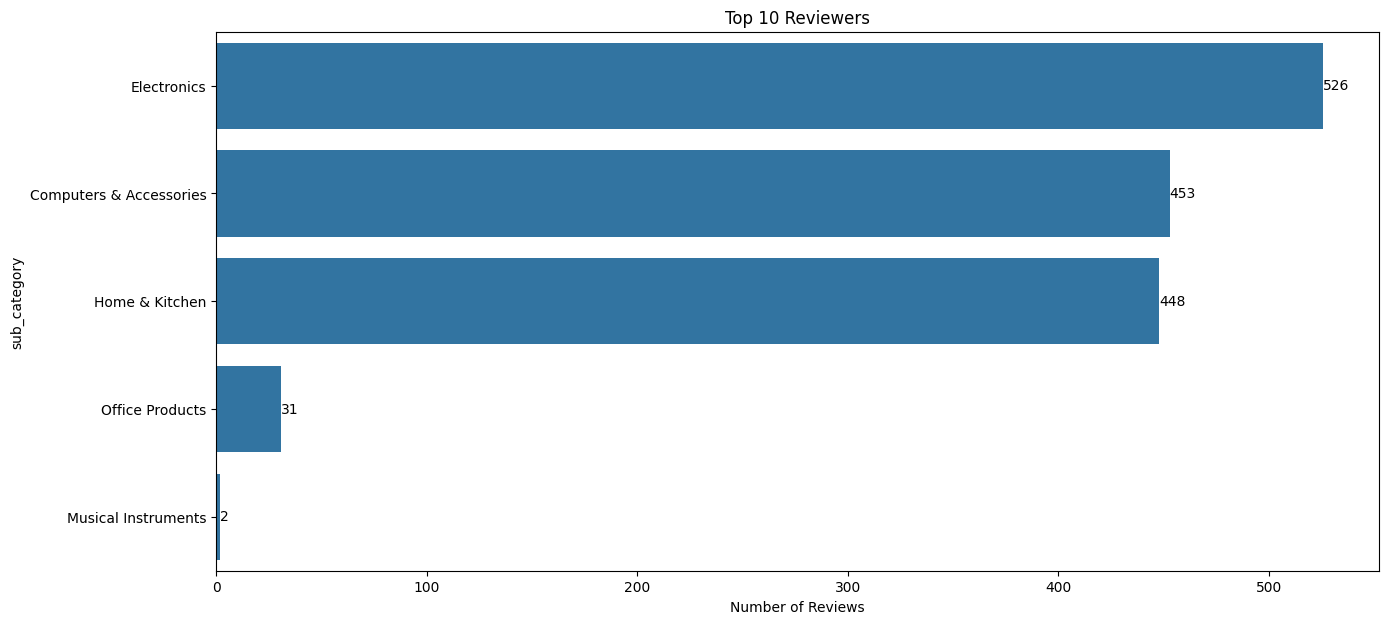

In [411]:

reviewers_count = df['sub_category'].value_counts().reset_index(name = 'counts')

fig, ax = plt.subplots(1, 1, figsize=(15, 7))

sns.barplot(data = reviewers_count.sort_values('counts', ascending = False).head(5), 
            x = 'counts', 
            y = 'sub_category').set(title = 'Top 10 Reviewers', 
                                 xlabel = 'Number of Reviews', 
                                 ylabel = 'sub_category')

ax.bar_label(ax.containers[0])

plt.show()

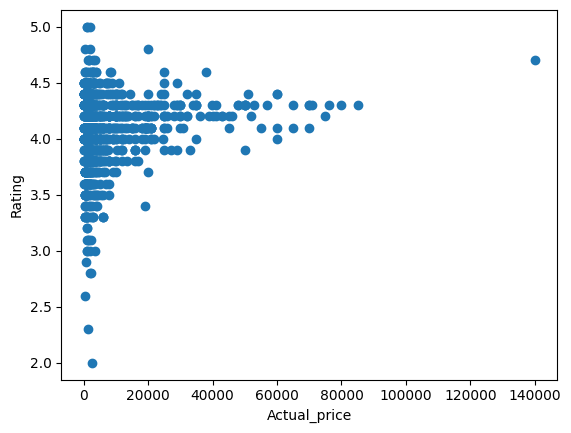

In [338]:
# Plot actual_price vs. rating
plt.scatter(df['actual_price'], df['rating'])
plt.xlabel('Actual_price')
plt.ylabel('Rating')
plt.show()

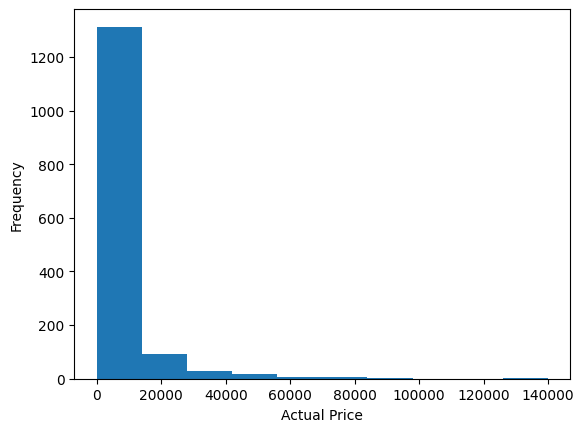

In [339]:
# Plot distribution of actual_price
plt.hist(df['actual_price'])
plt.xlabel('Actual Price')
plt.ylabel('Frequency')
plt.show()

# SEPERATION OF CATEGORICAL COLUMN AND NUMERIC COLUMNS

In [340]:
num_cols = df.dtypes[df.dtypes!='object'].index
cat_cols = df.dtypes[df.dtypes=='object'].index

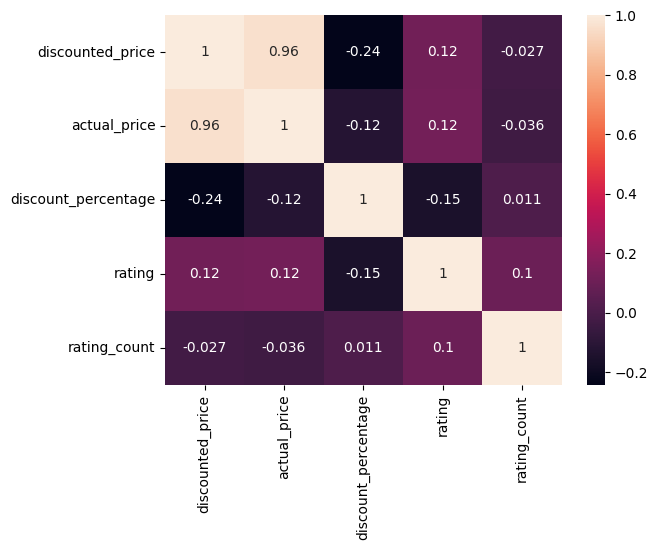

Index(['discounted_price', 'actual_price', 'discount_percentage', 'rating',
       'rating_count'],
      dtype='object')


In [341]:
correlation_matrix =df[num_cols].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()
print(num_cols)

In [342]:
cat_cols

Index(['product_id', 'product_name', 'about_product', 'user_id', 'user_name',
       'review_id', 'review_title', 'review_content', 'img_link',
       'product_link', 'category', 'subcategory', 'sub_category',
       'main_category'],
      dtype='object')

In [343]:
df.head()

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,category,subcategory,sub_category,main_category
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,0.64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Computers & Accessories,Accessories & Peripherals,Computers & Accessories,Computers & Accessories
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,0.43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Computers & Accessories,Accessories & Peripherals,Computers & Accessories,Computers & Accessories
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,0.90,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,Computers & Accessories,Accessories & Peripherals,Computers & Accessories,Computers & Accessories
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,0.53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,Computers & Accessories,Accessories & Peripherals,Computers & Accessories,Computers & Accessories
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.0,399.0,0.61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,Computers & Accessories,Accessories & Peripherals,Computers & Accessories,Computers & Accessories


In [344]:
cat_cols

Index(['product_id', 'product_name', 'about_product', 'user_id', 'user_name',
       'review_id', 'review_title', 'review_content', 'img_link',
       'product_link', 'category', 'subcategory', 'sub_category',
       'main_category'],
      dtype='object')

# CHECKIMG THE LENGHTH OF THE COOMMENT SO WE CAN ANALYIS THE POSTIVE AND NEGATIVE RECOMMENDATION  

In [345]:
df["Length"]=df["review_content"].apply(len)

In [346]:
df.drop(columns=["subcategory","main_category"],inplace=True)

In [347]:
df.head()

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,category,sub_category,Length
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,0.64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Computers & Accessories,Computers & Accessories,483
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,0.43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Computers & Accessories,Computers & Accessories,1186
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,0.90,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,Computers & Accessories,Computers & Accessories,271
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,0.53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,Computers & Accessories,Computers & Accessories,443
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.0,399.0,0.61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,Computers & Accessories,Computers & Accessories,2451


In [348]:
# Randomly checking for 10 record
print(f"' verified_reviews' column value:{df.iloc[10]['review_content']}")
print(f'Lenth of review : {len(df.iloc[10]["review_content"])}')
print(f' Length column value : {df.iloc[10]["Length"]}')


'''we can see that length of reviews is the same as 
 the value in the Lenth column of the record'''  

' verified_reviews' column value:The cable is efficient in fast charging but in quick data transfer. Overall fine.,I like the usb c  L shape. Nylon Shielded core wire it improves the life of the cable.,i think i buy these every 6 months or so. fast charging stops working after a while. probbly something to do with the cable design. the cable gets twisted over time and I suspect that breaks the high capacity wires inside. but i keep buying it because there arent too many options in an L shaped design,Good and durable product. Sometime the charges doesn't work on few adapters. there might be few cut off or something but works fine on apple adapter, Car charger, USB,The product is really good at affordable price.,Good and fast charging, and value for money,பொருள் உடைய கடினத்தன்மையின் நன்றாக உள்ளது சார்ஜ் ஏறும் வேகம் 15wat,Not a fast charger.  Very slow charging with 65w.  L-shape pin is very useful.
Lenth of review : 876
 Length column value : 876


'we can see that length of reviews is the same as \n the value in the Lenth column of the record'

In [349]:
df["rating"].value_counts()

rating
4.1    244
4.3    230
4.2    228
4.0    181
3.9    124
4.4    123
3.8     86
4.5     75
3.7     42
3.6     35
3.5     26
4.6     17
3.3     16
3.4     10
4.7      6
3.0      4
3.1      4
5.0      3
4.8      3
3.2      2
2.8      2
2.3      1
2.0      1
2.6      1
2.9      1
Name: count, dtype: int64

In [350]:
num_rating_df=df.groupby("product_name").count()["rating"].reset_index()
num_rating_df.rename(columns={"rating":"num_ratings"},inplace=True)
num_rating_df

,product_name,num_ratings
0,!!1000 Watt/2000-Watt Room Heater!! Fan Heater...,1
1,!!HANEUL!!1000 Watt/2000-Watt Room Heater!! Fa...,1
2,10WeRun Id-116 Bluetooth Smartwatch Wireless F...,1
3,"10k 8k 4k HDMI Cable, Certified 48Gbps 1ms Ult...",1
4,"3M Post-it Sticky Note Cube, 200 Sheets (4 Col...",1
...,...,...
1332,realme Buds Wireless in Ear Bluetooth Earphone...,1
1333,"realme narzo 50 (Speed Blue, 4GB RAM+64GB Stor...",1
1334,"realme narzo 50i (Mint Green, 2GB RAM+32GB Sto...",1
1335,"rts [2 Pack] Mini USB C Type C Adapter Plug, T...",1


In [351]:
avg_rating_df=df.groupby("product_name")["rating"].mean().reset_index()
avg_rating_df.rename(columns={"rating":"avg_ratings"},inplace=True)
avg_rating_df

,product_name,avg_ratings
0,!!1000 Watt/2000-Watt Room Heater!! Fan Heater...,4.5
1,!!HANEUL!!1000 Watt/2000-Watt Room Heater!! Fa...,3.4
2,10WeRun Id-116 Bluetooth Smartwatch Wireless F...,4.1
3,"10k 8k 4k HDMI Cable, Certified 48Gbps 1ms Ult...",4.6
4,"3M Post-it Sticky Note Cube, 200 Sheets (4 Col...",4.4
...,...,...
1332,realme Buds Wireless in Ear Bluetooth Earphone...,4.1
1333,"realme narzo 50 (Speed Blue, 4GB RAM+64GB Stor...",4.2
1334,"realme narzo 50i (Mint Green, 2GB RAM+32GB Sto...",4.0
1335,"rts [2 Pack] Mini USB C Type C Adapter Plug, T...",4.3


In [352]:
Popular_df=num_rating_df.merge(avg_rating_df,on="product_name")
Popular_df

,product_name,num_ratings,avg_ratings
0,!!1000 Watt/2000-Watt Room Heater!! Fan Heater...,1,4.5
1,!!HANEUL!!1000 Watt/2000-Watt Room Heater!! Fa...,1,3.4
2,10WeRun Id-116 Bluetooth Smartwatch Wireless F...,1,4.1
3,"10k 8k 4k HDMI Cable, Certified 48Gbps 1ms Ult...",1,4.6
4,"3M Post-it Sticky Note Cube, 200 Sheets (4 Col...",1,4.4
...,...,...,...
1332,realme Buds Wireless in Ear Bluetooth Earphone...,1,4.1
1333,"realme narzo 50 (Speed Blue, 4GB RAM+64GB Stor...",1,4.2
1334,"realme narzo 50i (Mint Green, 2GB RAM+32GB Sto...",1,4.0
1335,"rts [2 Pack] Mini USB C Type C Adapter Plug, T...",1,4.3


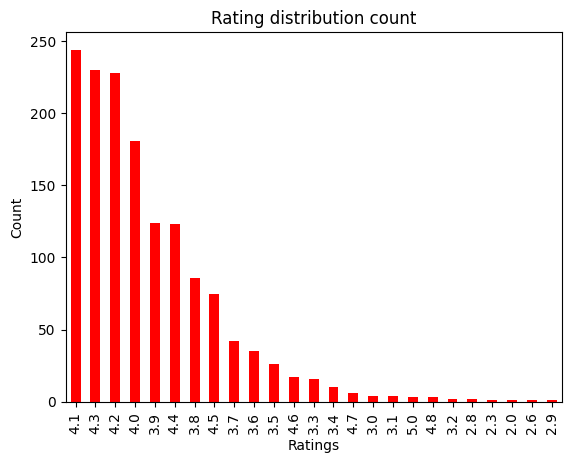

In [353]:
df["rating"].value_counts().plot.bar(color="red")
plt.title('Rating distribution count')
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.show()


In [354]:
print(f'Rating value count-percenatge distribution : \n{round(df["rating"].value_counts()/df.shape[0]*100,2)}')

Rating value count-percenatge distribution : 
rating
4.1    16.66
4.3    15.70
4.2    15.56
4.0    12.35
3.9     8.46
4.4     8.40
3.8     5.87
4.5     5.12
3.7     2.87
3.6     2.39
3.5     1.77
4.6     1.16
3.3     1.09
3.4     0.68
4.7     0.41
3.0     0.27
3.1     0.27
5.0     0.20
4.8     0.20
3.2     0.14
2.8     0.14
2.3     0.07
2.0     0.07
2.6     0.07
2.9     0.07
Name: count, dtype: float64


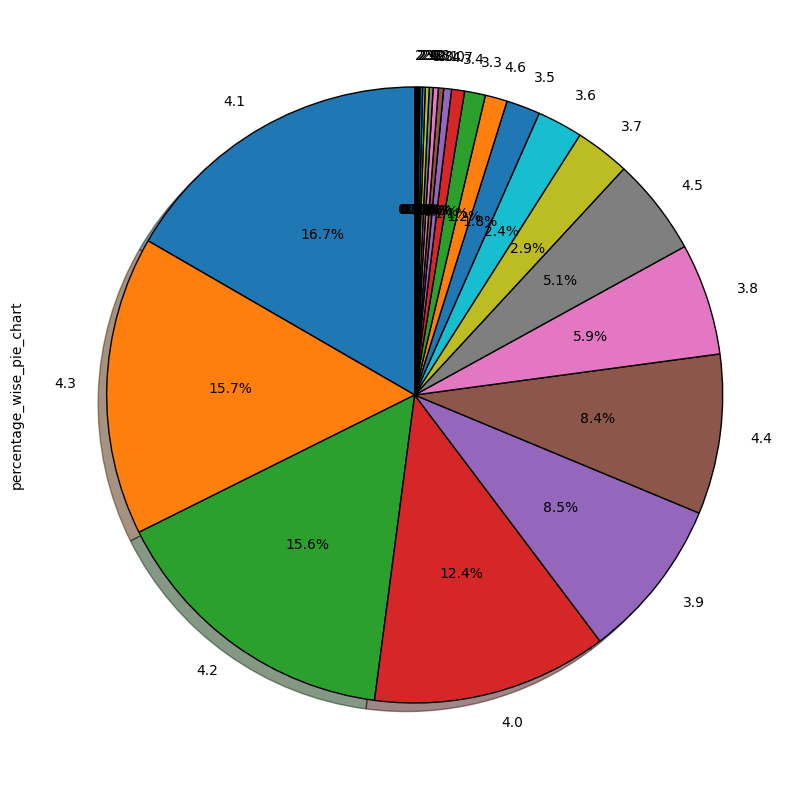

In [355]:
fig=plt.figure(figsize=(50,10))
wp={"linewidth":1,"edgecolor":"black"}
tags=df["rating"].value_counts()/df.shape[0]
tags.plot(kind="pie",autopct="%1.1f%%",shadow=True,startangle=90,wedgeprops=wp,label="percentage_wise_pie_chart")

plt.show()

# RANKING WISE SCORE

In [356]:
ranking = []

for score in df['rating']:
    if score <= .9 : ranking.append('Very Poor')
    elif score <= 1.9 : ranking.append('Poor')
    elif score <= 2.9 : ranking.append('Average')
    elif score <= 3.9 : ranking.append('Good')
    elif score <= 4.9 : ranking.append('Very Good')
    elif score == 5.0 : ranking.append('Excellent')

# Add the ranking list as a ranking column in the amazon dataframe.
# Use the .astype() command to convert the values in the ranking column into a category data type.

df['ranking'] = ranking

df['ranking'] = df['ranking'].astype('category')

In [357]:
df.head()

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,category,sub_category,Length,ranking
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,0.64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Computers & Accessories,Computers & Accessories,483,Very Good
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,0.43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Computers & Accessories,Computers & Accessories,1186,Very Good
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,0.90,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,Computers & Accessories,Computers & Accessories,271,Good
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,0.53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,Computers & Accessories,Computers & Accessories,443,Very Good
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.0,399.0,0.61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,Computers & Accessories,Computers & Accessories,2451,Very Good


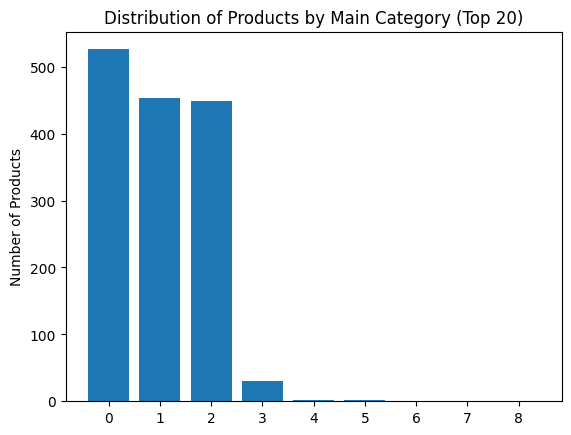

Top 20 main categories:
          Main Category  Number of Products
            Electronics                 526
Computers & Accessories                 453
         Home & Kitchen                 448
        Office Products                  31
    Musical Instruments                   2
       Home Improvement                   2
           Toys & Games                   1
        Car & Motorbike                   1
  Health & PersonalCare                   1


In [359]:
main_category_counts = df['category'].value_counts()[:20] # Select only the top 20 main categories.
plt.bar(range(len(main_category_counts)), main_category_counts.values)
plt.ylabel('Number of Products')
plt.title('Distribution of Products by Main Category (Top 20)')
plt.xticks(range(len(main_category_counts))) 
plt.show()

# Top 20 main categories 
top_main_categories = pd.DataFrame({'Main Category': main_category_counts.index, 'Number of Products': main_category_counts.values})
print('Top 20 main categories:')
print(top_main_categories.to_string(index=False))

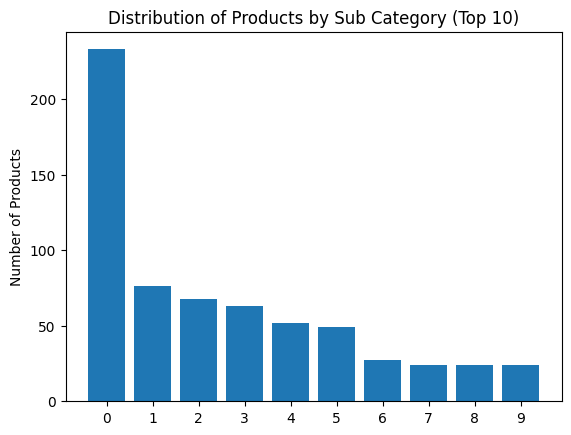

Top 10 sub categories:
    Sub Category  Number of Products
       USBCables                 233
    SmartWatches                  76
     Smartphones                  68
SmartTelevisions                  63
          In-Ear                  52
  RemoteControls                  49
   MixerGrinders                  27
      HDMICables                  24
        DryIrons                  24
            Mice                  24


In [111]:
sub_category_counts = df['sub_category'].value_counts()[:10] # Select only the top 10 last categories.
plt.bar(range(len(sub_category_counts)), sub_category_counts.values)
plt.ylabel('Number of Products')
plt.title('Distribution of Products by Sub Category (Top 10)')
plt.xticks(range(len(sub_category_counts))) 
plt.show()

# Top 10 sub categories 
top_sub_categories = pd.DataFrame({'Sub Category': sub_category_counts.index, 'Number of Products': sub_category_counts.values})
print('Top 10 sub categories:')
print(top_sub_categories.to_string(index=False))

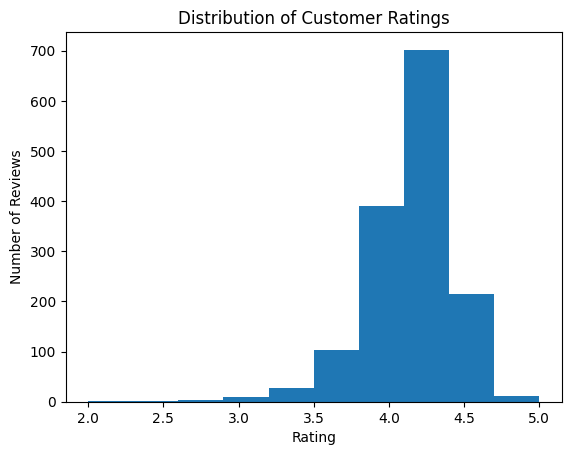

In [360]:
#Analyze the distribution of customer ratings using a histogram.
# Plot histogram
plt.hist(df['rating'])
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Customer Ratings')
plt.show()

# Create table with values per cluster
bins = [0, 1, 2, 3, 4, 5] # Define bin edges
df['cluster'] = pd.cut(df['rating'], bins=bins, include_lowest=True, labels=['0-1', '1-2', '2-3', '3-4', '4-5'])


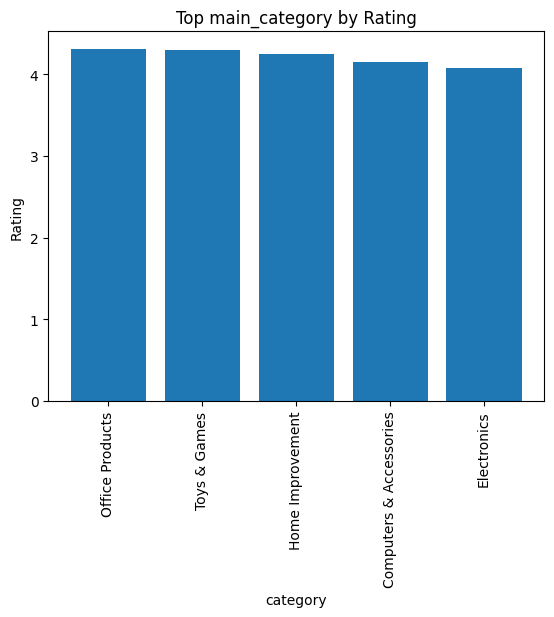

                  category    rating
0          Office Products  4.309677
1             Toys & Games  4.300000
2         Home Improvement  4.250000
3  Computers & Accessories  4.154967
4              Electronics  4.081749
5           Home & Kitchen  4.040402
6    Health & PersonalCare  4.000000
7      Musical Instruments  3.900000
8          Car & Motorbike  3.800000


In [363]:
# Calculate the top main categories
top = df.groupby(['category'])['rating'].mean().sort_values(ascending=False).head(5).reset_index()

# Create a bar plot
plt.bar(top['category'], top['rating'])

# Add labels and title
plt.xlabel('category')
plt.ylabel('Rating')
plt.title('Top main_category by Rating')

# Rotate x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.show()
ranking = df.groupby('category')['rating'].mean().sort_values(ascending=False).reset_index()
print(ranking)


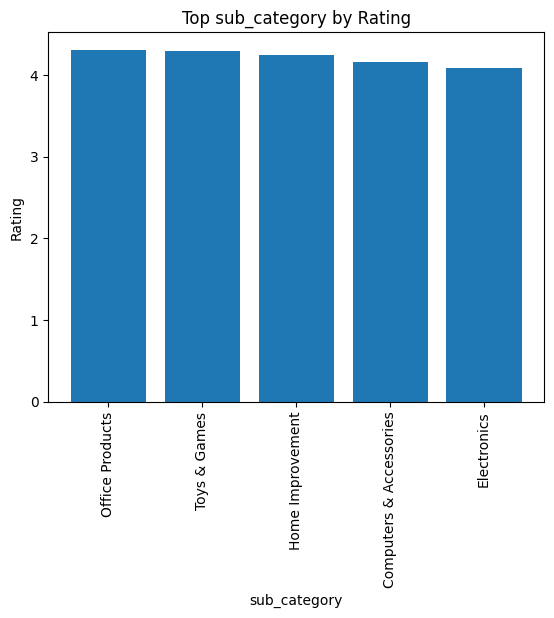

              sub_category    rating
0          Office Products  4.309677
1             Toys & Games  4.300000
2         Home Improvement  4.250000
3  Computers & Accessories  4.154967
4              Electronics  4.081749
5           Home & Kitchen  4.040402
6    Health & PersonalCare  4.000000
7      Musical Instruments  3.900000
8          Car & Motorbike  3.800000


In [364]:
# Calculate the top sub categories
top = df.groupby(['sub_category'])['rating'].mean().sort_values(ascending=False).head(5).reset_index()

# Create a bar plot
plt.bar(top['sub_category'], top['rating'])

# Add labels and title
plt.xlabel('sub_category')
plt.ylabel('Rating')
plt.title('Top sub_category by Rating')

# Rotate x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.show()
ranking = df.groupby('sub_category')['rating'].mean().sort_values(ascending=False).reset_index()
print(ranking)

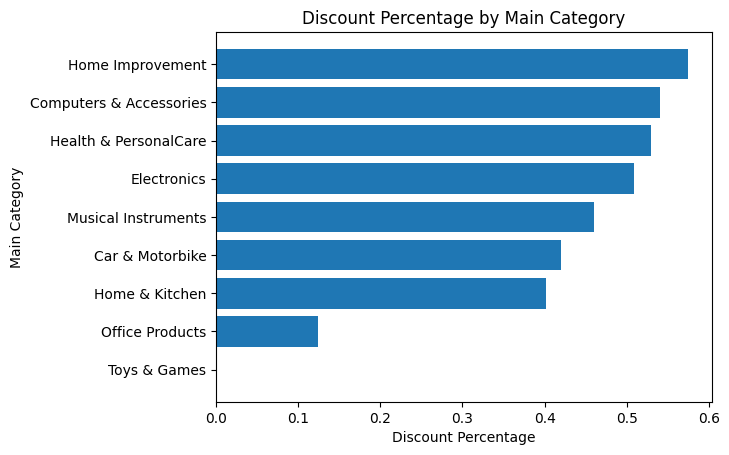

                  Category  Mean Discount Percentage
0             Toys & Games                  0.000000
1          Office Products                  0.123548
2           Home & Kitchen                  0.401205
3          Car & Motorbike                  0.420000
4      Musical Instruments                  0.460000
5              Electronics                  0.508289
6    Health & PersonalCare                  0.530000
7  Computers & Accessories                  0.540243
8         Home Improvement                  0.575000


In [366]:
# sort the means in descending order
mean_discount_by_category = df.groupby('category')['discount_percentage'].mean()
mean_discount_by_category = mean_discount_by_category.sort_values(ascending=True)

# create the horizontal bar chart
plt.barh(mean_discount_by_category.index, mean_discount_by_category.values)
plt.title('Discount Percentage by Main Category')
plt.xlabel('Discount Percentage')
plt.ylabel('Main Category')
plt.show()

table = pd.DataFrame({' Category': mean_discount_by_category.index, 'Mean Discount Percentage': mean_discount_by_category.values})

print(table)

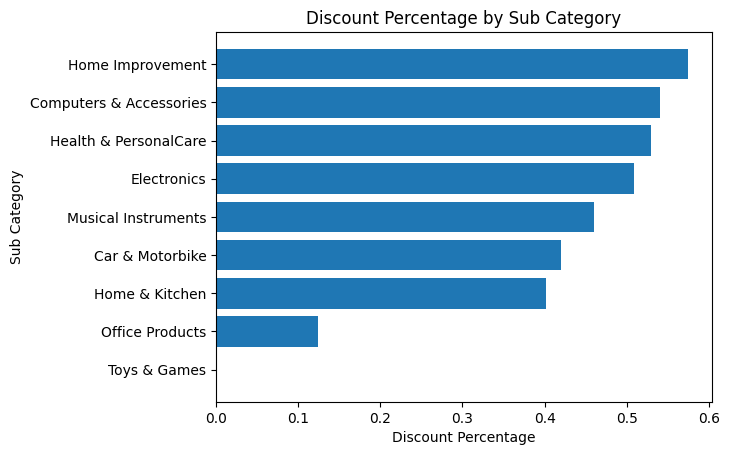

              Sub Category  Mean Discount Percentage
0             Toys & Games                  0.000000
1          Office Products                  0.123548
2           Home & Kitchen                  0.401205
3          Car & Motorbike                  0.420000
4      Musical Instruments                  0.460000
5              Electronics                  0.508289
6    Health & PersonalCare                  0.530000
7  Computers & Accessories                  0.540243
8         Home Improvement                  0.575000


In [367]:
# sort the means in descending order
mean_discount_by_sub_category = df.groupby('sub_category')['discount_percentage'].mean().head(15)
mean_discount_by_sub_category = mean_discount_by_sub_category.sort_values(ascending=True)

# create the horizontal bar chart
plt.barh(mean_discount_by_sub_category.index, mean_discount_by_sub_category.values)
plt.title('Discount Percentage by Sub Category')
plt.xlabel('Discount Percentage')
plt.ylabel('Sub Category')
plt.show()

table = pd.DataFrame({'Sub Category': mean_discount_by_sub_category.index, 'Mean Discount Percentage': mean_discount_by_sub_category.values})

print(table)

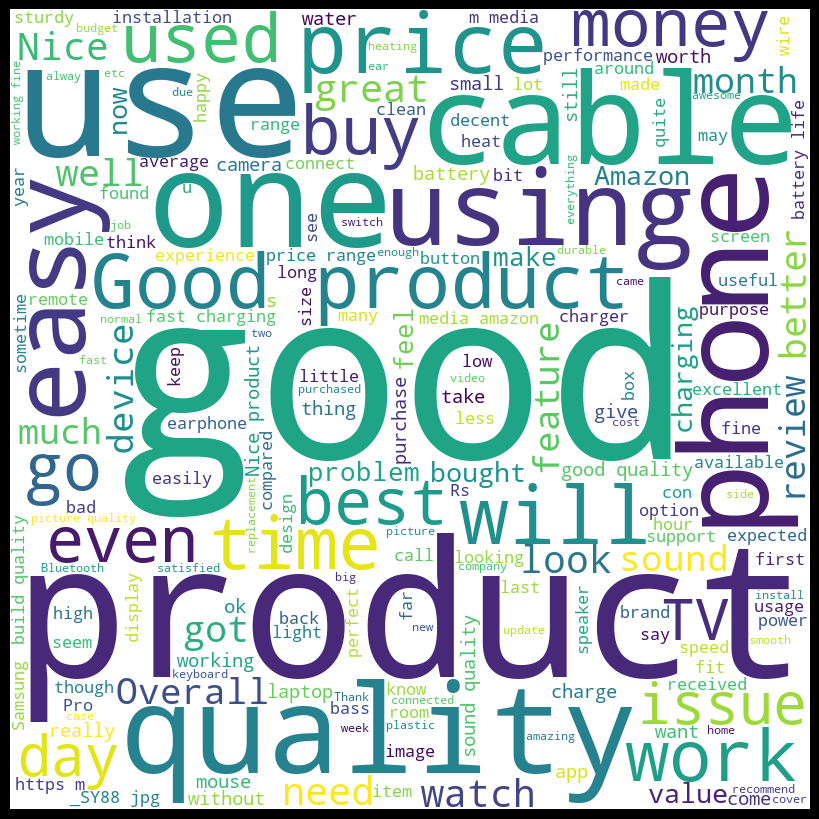

In [368]:
from wordcloud import WordCloud

#  Analyze the reviews by creating word clouds or frequency tables of the most common words used in the reviews.
reviews_text = ' '.join(df['review_content'].dropna().values)
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(reviews_text)
plt.figure(figsize=(8, 8), facecolor="Black")
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

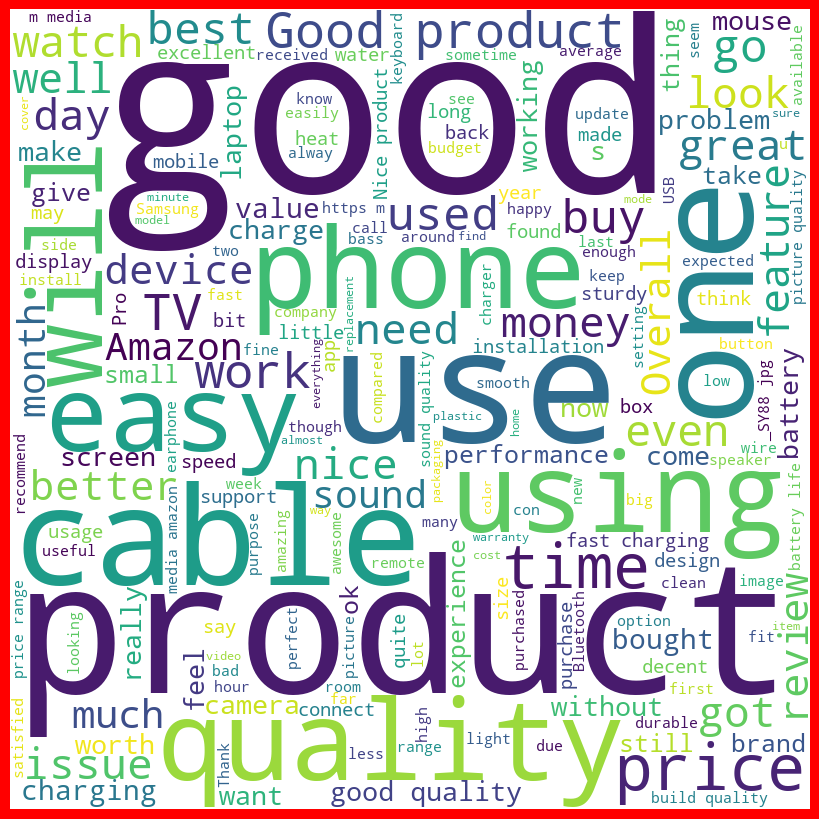

In [369]:
# Filter the dataframe to include only products with a rating lower than 2
low_rating_df = df[df['rating'] > 4.0]

# Create a string of all the reviews for these products
reviews_text = ' '.join(low_rating_df['review_content'].dropna().values)

# Generate the wordcloud
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(reviews_text)

# Plot the wordcloud
plt.figure(figsize=(8, 8), facecolor="Red")
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [370]:
# Perform statistical analysis to identify any correlations between different features, such as the relationship between product price and customer rating.
# Drop non-numeric columns
numeric_cols = df.select_dtypes(include=['float64','int64'])
correlation_matrix =numeric_cols.corr()

# Print the correlation matrix
print(correlation_matrix)


                     discounted_price  actual_price  discount_percentage  \
discounted_price             1.000000      0.961915            -0.242412   
actual_price                 0.961915      1.000000            -0.118098   
discount_percentage         -0.242412     -0.118098             1.000000   
rating                       0.120386      0.121744            -0.154563   
rating_count                -0.027081     -0.035959             0.011097   
Length                       0.309129      0.296003            -0.125652   

                       rating  rating_count    Length  
discounted_price     0.120386     -0.027081  0.309129  
actual_price         0.121744     -0.035959  0.296003  
discount_percentage -0.154563      0.011097 -0.125652  
rating               1.000000      0.101700  0.077109  
rating_count         0.101700      1.000000  0.154628  
Length               0.077109      0.154628  1.000000  


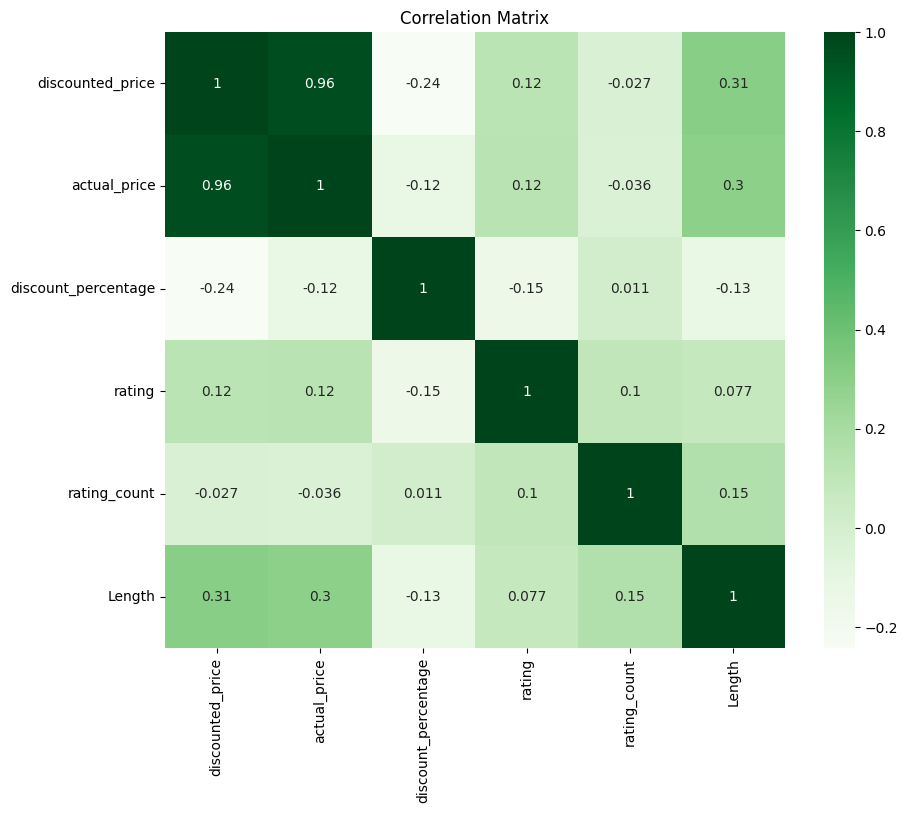

In [371]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens')
plt.title('Correlation Matrix')
plt.show()

# some calculated statistical info 

In [372]:
df.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count,Length
count,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000
mean,3125.310874,5444.990635,0.476915,4.096451,18277.634812,1394.137884
std,6944.304394,10874.826864,0.216359,0.291620,42727.398216,1823.491796
min,39.000000,39.000000,0.000000,2.000000,2.000000,67.000000
25%,325.000000,800.000000,0.320000,4.000000,1191.000000,505.000000
50%,799.000000,1650.000000,0.500000,4.100000,5179.000000,823.000000
75%,1999.000000,4295.000000,0.630000,4.300000,17325.000000,1388.000000
max,77990.000000,139900.000000,0.940000,5.000000,426973.000000,18547.000000


In [373]:
average_ratings = df.groupby("category")["rating"].mean().reset_index()

''''The output shows that most product categories have generally positive customer
feedback, with average ratings above 3.50. However, some categories (e.g., 2 and 3) have lower ratings,
suggesting potential areas for improvement. Further analysis of these categories could help identify specific
reasons for lower feedback and identify potential solutions.'''
average_ratings

,category,rating
0,Car & Motorbike,3.800000
1,Computers & Accessories,4.154967
2,Electronics,4.081749
3,Health & PersonalCare,4.000000
4,Home & Kitchen,4.040402
5,Home Improvement,4.250000
6,Musical Instruments,3.900000
7,Office Products,4.309677
8,Toys & Games,4.300000


'The output shows that discounted prices are generally lower than actual prices, with a median discounted price of 200 and a\nmedian actual price of 400.\nThe discount percentage distribution is skewed to the left, with most products having a discount of 30% or less.\nThe output suggests that there may be opportunities to increase discounted prices or discount percentages\nto attract more customers.'

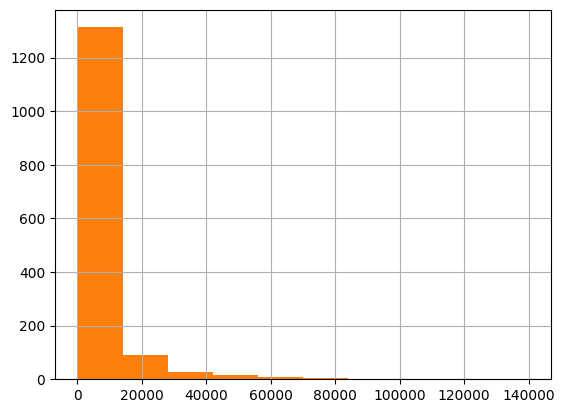

In [374]:
df["discounted_price"].hist(label="Discounted Price")
df["actual_price"].hist(label="Actual Price")

# Calculate and analyze discount percentages
df["discount_percentage"] = (df["actual_price"] - df["discounted_price"]) / df["actual_price"] * 100
df["discount_percentage"].describe()
df["discount_percentage"].hist(label="Discount Percentage")
'''The output shows that discounted prices are generally lower than actual prices, with a median discounted price of 200 and a
median actual price of 400.
The discount percentage distribution is skewed to the left, with most products having a discount of 30% or less.
The output suggests that there may be opportunities to increase discounted prices or discount percentages
to attract more customers.'''

In [375]:
#Calculate average discount percentage per category
avg_discount_per_category = df.groupby('category')['discount_percentage'].mean()

# Optional: Visualization
#sns.barplot(x=avg_discount_per_category.index, y=avg_discount_per_category.values)
#plt.xlabel("Category")
#plt.ylabel("Average Discount Percentage")
#plt.show() # visiblity of the data is low 
# Display results
print(avg_discount_per_category) 


category
Car & Motorbike            41.525000
Computers & Accessories    54.022680
Electronics                50.815427
Health & PersonalCare      52.684211
Home & Kitchen             40.116870
Home Improvement           57.944088
Musical Instruments        45.808298
Office Products            12.359817
Toys & Games                0.000000
Name: discount_percentage, dtype: float64


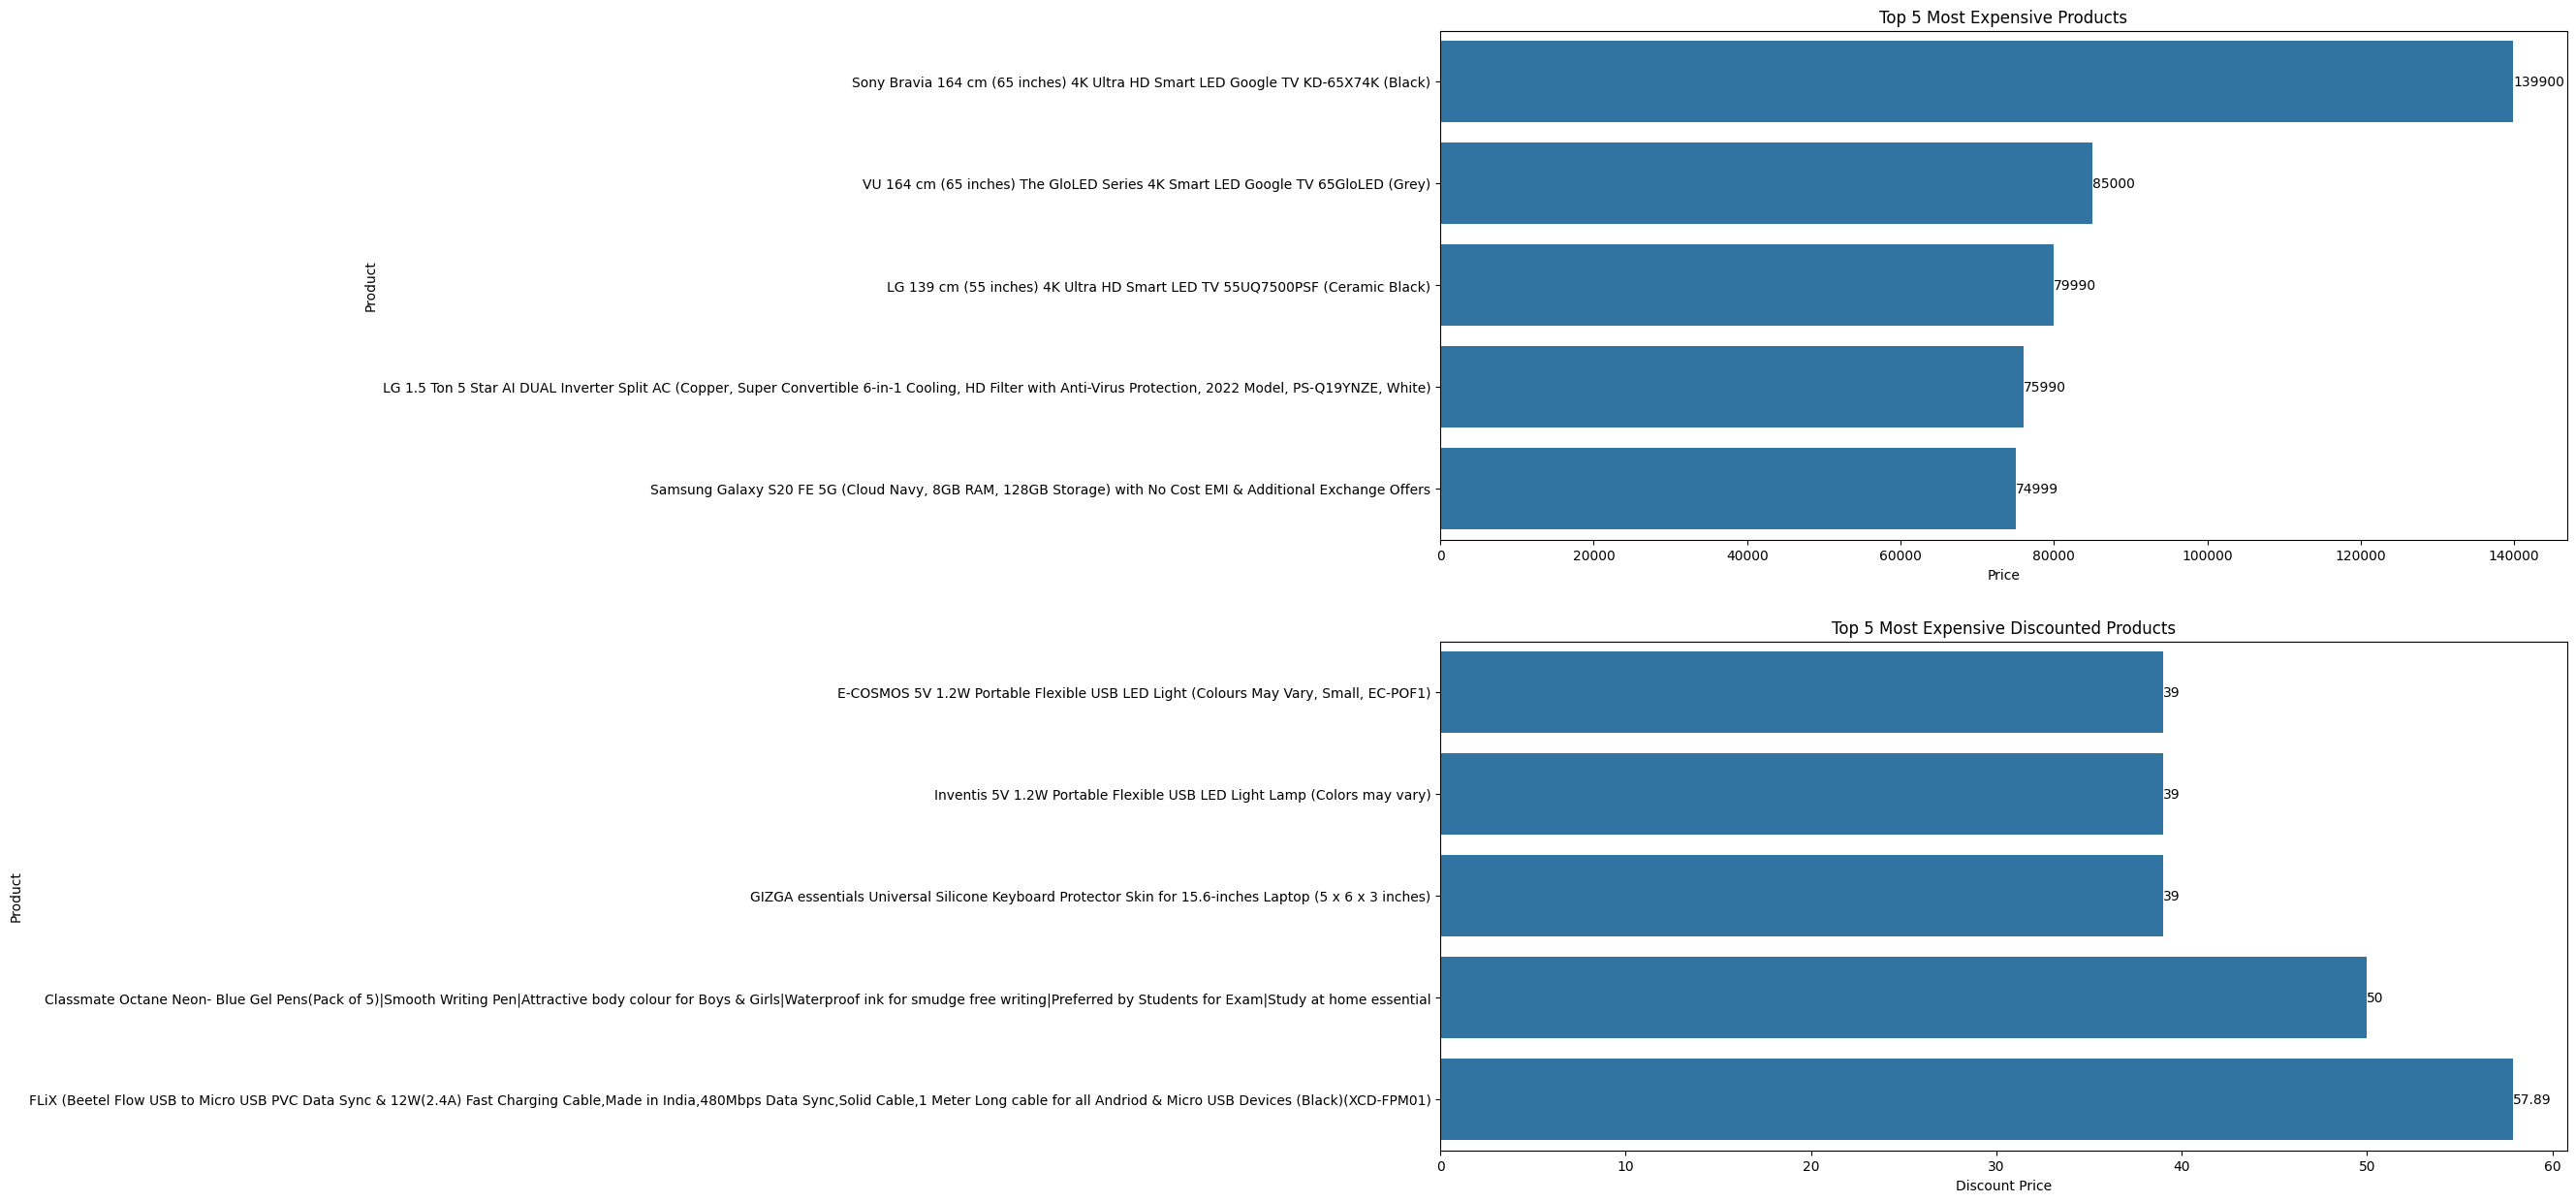

In [376]:
fig, ax = plt.subplots(2, 1, figsize=(15, 15))

sns.barplot(ax = ax[0], 
            data = df.sort_values('actual_price', ascending = False).head(5), 
            x = 'actual_price', 
            y = 'product_name').set(title = 'Top 5 Most Expensive Products', 
                                    xlabel = 'Price', 
                                    ylabel = 'Product')
sns.barplot(ax = ax[1], 
            data = df.sort_values('discounted_price', ascending = True).head(5), 
            x = 'discounted_price', 
            y = 'product_name').set(title = 'Top 5 Most Expensive Discounted Products', 
                                    xlabel = 'Discount Price', 
                                    ylabel = 'Product')

ax[0].bar_label(ax[0].containers[0])
ax[1].bar_label(ax[1].containers[0])

plt.show()

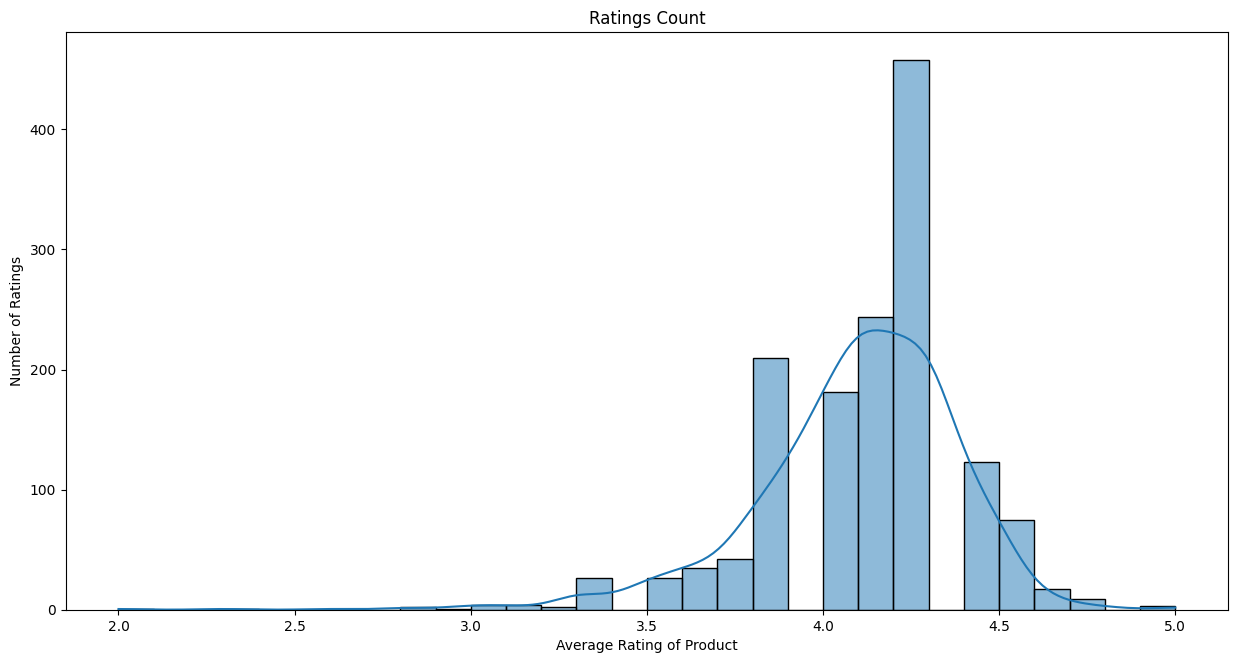

In [377]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7.5))

# Use the .histplot() command to create a histogram.

sns.histplot(df.rating, 
             bins = 30, 
             binrange = [2,5], 
             kde = True).set(title = 'Ratings Count', 
                             xlabel = 'Average Rating of Product', 
                             ylabel = 'Number of Ratings')

plt.show()


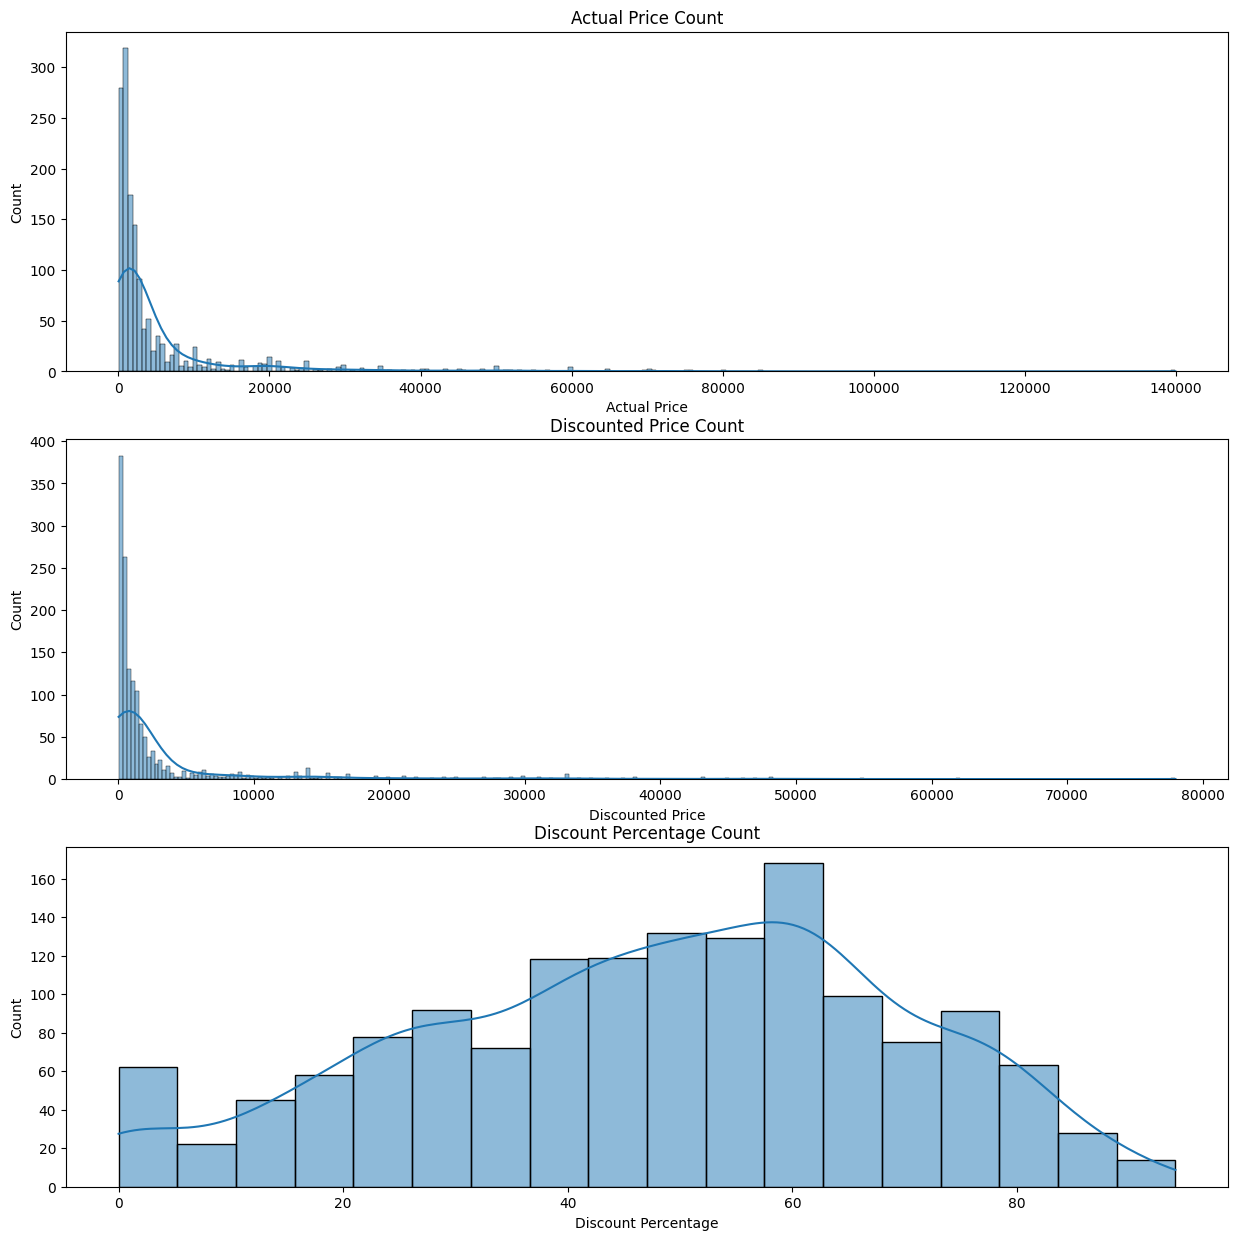

In [378]:
fig, ax = plt.subplots(3, 1, figsize=(15, 15))

sns.histplot(df.actual_price, 
             kde = True, 
             ax = ax[0]).set(title = 'Actual Price Count', 
                             xlabel = 'Actual Price', 
                             ylabel = 'Count')
sns.histplot(df.discounted_price, 
             kde = True,  
             ax = ax[1]).set(title = 'Discounted Price Count', 
                             xlabel = 'Discounted Price', 
                             ylabel = 'Count')
sns.histplot(df.discount_percentage, 
             kde = True, 
             ax = ax[2]).set(title = 'Discount Percentage Count', xlabel = 'Discount Percentage', 
                             ylabel = 'Count')

plt.show()

In [379]:
ranking_pivot = df.loc[:, ['ranking']]
ranking_pivot['percentage'] = 1

# Create a pivot table using the dataframe.
# The pivot table will group by ranking ('Good', 'Very Good', etc.) and will add up the 1's in the percentage column to calculate the percentage of each ranking.

ranking_pivot_table = ranking_pivot.pivot_table(values = ['percentage'], 
                                                index = ['ranking'], 
                                                aggfunc = lambda x: round(sum(x)/sum(ranking_pivot['percentage']) * 100, 2))

ranking_pivot_table

,percentage
ranking,
Average,0.41
Excellent,0.20
Good,23.82
Very Good,75.56


In [380]:
num_cols=df.dtypes[df.dtypes!="object"].index
print(num_cols)

Index(['discounted_price', 'actual_price', 'discount_percentage', 'rating',
       'rating_count', 'Length', 'ranking', 'cluster'],
      dtype='object')


In [383]:
df.head()

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,category,sub_category,Length,ranking,cluster
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,63.694268,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Computers & Accessories,Computers & Accessories,483,Very Good,4-5
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,42.979943,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Computers & Accessories,Computers & Accessories,1186,Very Good,3-4
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,89.520800,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,Computers & Accessories,Computers & Accessories,271,Good,3-4
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,52.932761,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,Computers & Accessories,Computers & Accessories,443,Very Good,4-5
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.0,399.0,61.403509,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,Computers & Accessories,Computers & Accessories,2451,Very Good,4-5


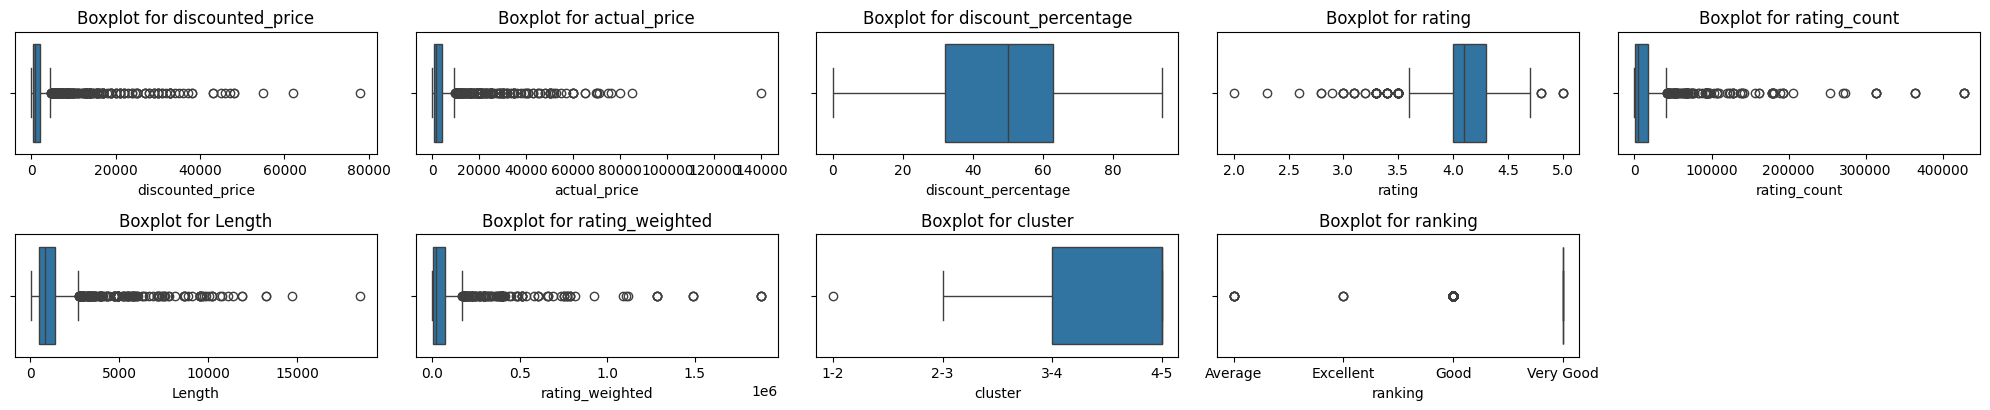

In [386]:
cols = ['discounted_price', 'actual_price', 'discount_percentage', 'rating',
       'rating_count', 'Length', 'rating_weighted', 'cluster', 'ranking']

plt.figure(figsize=(20,20))
for i in range(len(cols)): 
    plt.subplot(10,5,i+1)
    sns.boxplot(x=df[cols[i]])
    plt.title(f'Boxplot for {cols[i]}')

plt.tight_layout()
plt.show()

In [388]:
a = df[num_cols].describe(percentiles =[0.01,0.02,0.03,0.97,0.98,0.99]).T
a = a.iloc[:,3:]
a
# Outliers are there but we will treat them after some time 

,min,1%,2%,3%,50%,97%,98%,99%,max
discounted_price,39.0,86.92,99.00,100.00,799.000000,22079.000000,28999.000000,34359.000000,77990.000000
actual_price,39.0,120.00,185.32,230.00,1650.000000,34078.280000,44432.520000,57906.000000,139900.000000
discount_percentage,0.0,0.00,0.00,0.00,50.016672,83.018597,85.149851,88.627633,94.118824
rating,2.0,3.20,3.30,3.50,4.100000,4.500000,4.500000,4.600000,5.000000
rating_count,2.0,13.64,29.84,56.84,5179.000000,107686.080000,152494.840000,197076.320000,426973.000000
Length,67.0,164.20,191.28,217.76,823.000000,6463.160000,8052.320000,9790.360000,18547.000000


In [389]:
df.dtypes

product_id               object
product_name             object
discounted_price        float64
actual_price            float64
discount_percentage     float64
rating                  float64
rating_count            float64
about_product            object
user_id                  object
user_name                object
review_id                object
review_title             object
review_content           object
img_link                 object
product_link             object
category                 object
sub_category             object
Length                    int64
ranking                category
cluster                category
rating_weighted         float64
dtype: object

In [390]:
# Imp_features to Predict the Discounted Price Based on Actual Price
new_df= df[['actual_price', 'discounted_price', 'discount_percentage', 'rating', 'rating_count']]

In [391]:
# copy of the data Frame 
df1=df.copy()
df2=df.copy()
df3=df.copy()

In [392]:
x =  new_df.drop(["discounted_price"],axis=1)                # independent features
y =  new_df["discounted_price"]                              # dependent feature
print(x.shape)
print(y.shape)

(1465, 4)
(1465,)


In [393]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

# Using the training data to create a linear regression model and finding the coefficient and intercept.¶
# The model is an equation that looks like this: Y = mX + b.

# Y = Discounted price. The value the model is trying to predict.
# m = Coefficient. The greater the number the more X influences Y.
# X = Actual price. The input value.
# b = Intercept. The value of Y when X = 0

(1172, 4)
(293, 4)
(1172,)
(293,)


In [394]:
#Use the LinearRegression().fit() command to perform linear regression using the training data.

Lr1=LinearRegression().fit(x_train, y_train)

# Use the .coef_ attribute to calcualte the coefficient.

print('coefficient = ',Lr1.coef_)

# Use the .intercept_ attribute to cacluate the intercept.

print('intercept = ', Lr1.intercept_)

coefficient =  [ 6.05477877e-01 -4.16065797e+01 -4.17263625e+02  1.63952234e-03]
intercept =  3462.566538998311


In [395]:
from sklearn.metrics import *

In [396]:
def eval_model_lr1(model,x_train,x_test,y_train,y_test,model_name):
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)
    #ypred_org = inv_boxcox(ypred,lamb)
    train_r2 = model.score(x_train,y_train)
    test_r2 = model.score(x_test,y_test)
    mae = mean_absolute_error(y_test,ypred)
    mse = mean_squared_error(y_test,ypred)
    rmse = np.sqrt(mean_squared_error(y_test,ypred))
    
    res = pd.DataFrame({'MAE':mae,'MSE':mse,'RMSE':rmse,
                        'Train_R2':train_r2,'Test_R2':test_r2},index=[model_name])
    return res

In [398]:
#Use the .predict() to predict the values of the depdentant variable using the model.
# Use the r2_score() command to calculate the R2 score by comparing the predicted dependant variable values with the actual dependant variable values.
lr1 = LinearRegression()
lr1_res = eval_model_lr1(lr1,x_train,x_test,y_train,y_test,'Lin_Reg')
lr1_res
'''The linear regression model has an R2 value of .935.
The model has a high R2 value and is able to predict the dependant variable very accurately.'''
lr1_res

,MAE,MSE,RMSE,Train_R2,Test_R2
Lin_Reg,814.111147,3.270084e+06,1808.337329,0.944278,0.935344


# OLS

In [399]:
x1 = x.copy()
y1 = y.copy()

In [400]:
print(x1.shape)
print(y1.shape)

(1465, 4)
(1465,)


In [402]:
x1 = sm.add_constant(x1)
ols_m1 = sm.OLS(y1,x1).fit()
ols_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       discounted_price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     5976.
Date:                Fri, 22 Mar 2024   Prob (F-statistic):               0.00
Time:                        05:57:04   Log-Likelihood:                -12946.
No. Observations:                1465   AIC:                         2.590e+04
Df Residuals:                    1460   BIC:                         2.593e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3462.7773    646.603      5.355      0.000    2194.408    4731.146
actual_price            0.6058      0.004    149.031      0.000       0.598       0.614
discount_percentage   -42.6990      2.051    -20.821      0.000     -46.722     -38.676
rating               -397.8872    153.106     -2.599      0.009    -698.219     -97.555
rating_count            0.0016      0.001      1.603      0.109      -0.000       0.004
==============================================================================
Omnibus:                      492.826   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            79096.985
Skew:                          -0.363   Prob(JB):                         0.00
Kurtosis:                      38.990   Cond. No.                     7.08e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [403]:
print(ols_m1.rsquared)
print(ols_m1.rsquared_adj)

0.9424355184343381
0.942277807525939


In [404]:
from sklearn.tree import *
from sklearn.ensemble import *
from xgboost import *

# Decision Tree

In [405]:
def eval_model(model,x_train,x_test,y_train,y_test,model_name):
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)
    train_r2 = model.score(x_train,y_train)
    test_r2 = model.score(x_test,y_test)
    mae = mean_absolute_error(y_test,ypred)
    mse = mean_squared_error(y_test,ypred)
    rmse = np.sqrt(mean_squared_error(y_test,ypred))
    
    res = pd.DataFrame({'MAE':mae,'MSE':mse,'RMSE':rmse,
                        'Train_R2':train_r2,'Test_R2':test_r2},index=[model_name])
    return res

In [406]:
x_train2,x_test2,y_train2,y_test2 = train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train2.shape)
print(x_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

(1172, 4)
(293, 4)
(1172,)
(293,)


In [407]:
dt1 = DecisionTreeRegressor(max_depth=5,min_samples_split=15)
dt1_res = eval_model(dt1,x_train, x_test, y_train, y_test, 'DT1')
dt1_res

,MAE,MSE,RMSE,Train_R2,Test_R2
DT1,562.077468,1.939703e+06,1392.732028,0.965661,0.961648


# Random Forest 

In [408]:
rf1 = RandomForestRegressor(n_estimators=70,max_depth=10,min_samples_split=15)
rf1_res = eval_model(rf1,x_train, x_test, y_train, y_test, 'RF1')
rf1_res

,MAE,MSE,RMSE,Train_R2,Test_R2
RF1,280.337902,1.544456e+06,1242.761511,0.97468,0.969463


In [409]:
rf_final = RandomForestRegressor(n_estimators=70,max_depth=10,min_samples_split=15)
rf_final.fit(x,y)

RandomForestRegressor(max_depth=10, min_samples_split=15, n_estimators=70)

In [410]:
ypred_test = rf_final.predict(x)
ypred_test[:10]

array([380.69320996, 202.99785041, 294.12639304, 317.87944519,
       167.67403367, 146.14252461, 189.6659429 , 221.2820984 ,
       497.72128695, 207.2241428 ])

# Final Result: Random  Forest Perform Better then others   

#                                                     Conclusion

# The primary goal of this project is to analyze the Amazon Sales dataset and identify insights based on the data. The Amazon Sales dataset is a valuable resource for businesses and researchers alike. It provides a wealth of information about customer behavior, product trends, and market conditions. By conducting exploratory data analysis (EDA) on this dataset, businesses can gain valuable insights that can help them make better decisions about their products, marketing, and operations.¶


# The categories that gain the most revenue are the "Electronics" and "Home & Kitchen" categories. Subcategories that gain the most include the "Laptops", "Tablets", "Home Theater, TV & Video", "Mobiles & Accessories", 'Heating, Cooling & Air Quality" and "Kitchen & Home Appliances" subcategories. In general, most products are in the 10 to 20 dollar range.

# Most discounts are in the 40% to 70% range. On average, the "Computers & Accessories" and "Electronics" categories offer the highest percentage in discounts. The "Wearable Technology" and "Headphones, Earbuds & Accessories" subcategories offer the highest percentage in discounts..

# There is a strong correlation between the actual price of a product and the discounted price of a product. A linear regression model was created to predict the discounted price using the actual price. The model is Discounted Price = .613(Actual Price) - 2.8. However, when testing the assumptions of the linear regression model, the model passed 2 out of 4 assumptions.


